<a href="https://colab.research.google.com/github/akhil9900/Neuralhomeassignment2/blob/main/Home_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Question 2: Convolution Operations with Different Parameters

import numpy as np
import tensorflow as tf

# Define 5x5 input matrix
input_matrix = np.array([[1, 2, 3, 4, 5],
                         [6, 7, 8, 9, 10],
                         [11, 12, 13, 14, 15],
                         [16, 17, 18, 19, 20],
                         [21, 22, 23, 24, 25]], dtype=np.float32)

# Define 3x3 kernel
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]], dtype=np.float32)

# Reshape input and kernel for TensorFlow
input_tensor = input_matrix.reshape(1, 5, 5, 1)  # (batch, height, width, channels)
kernel_tensor = kernel.reshape(3, 3, 1, 1)      # (height, width, in_channels, out_channels)

# Function to perform convolution
def conv_operation(input_tensor, kernel_tensor, strides, padding):
    conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), strides=strides,
                                        padding=padding, use_bias=False)
    conv_layer.build(input_tensor.shape)
    conv_layer.kernel.assign(kernel_tensor)  # Set kernel weights
    output = conv_layer(input_tensor)
    return output.numpy().squeeze()

# Perform convolutions
print("Stride = 1, Padding = 'VALID':")
output1 = conv_operation(input_tensor, kernel_tensor, strides=1, padding='valid')
print(output1)

print("\nStride = 1, Padding = 'SAME':")
output2 = conv_operation(input_tensor, kernel_tensor, strides=1, padding='same')
print(output2)

print("\nStride = 2, Padding = 'VALID':")
output3 = conv_operation(input_tensor, kernel_tensor, strides=2, padding='valid')
print(output3)

print("\nStride = 2, Padding = 'SAME':")
output4 = conv_operation(input_tensor, kernel_tensor, strides=2, padding='same')
print(output4)

Stride = 1, Padding = 'VALID':
[[-8. -8. -8.]
 [-8. -8. -8.]
 [-8. -8. -8.]]

Stride = 1, Padding = 'SAME':
[[-11.  -6.  -6.  -6.  17.]
 [-28.  -8.  -8.  -8.  36.]
 [-48.  -8.  -8.  -8.  56.]
 [-68.  -8.  -8.  -8.  76.]
 [-61.  -6.  -6.  -6.  67.]]

Stride = 2, Padding = 'VALID':
[[-8. -8.]
 [-8. -8.]]

Stride = 2, Padding = 'SAME':
[[-11.  -6.  17.]
 [-48.  -8.  56.]
 [-61.  -6.  67.]]


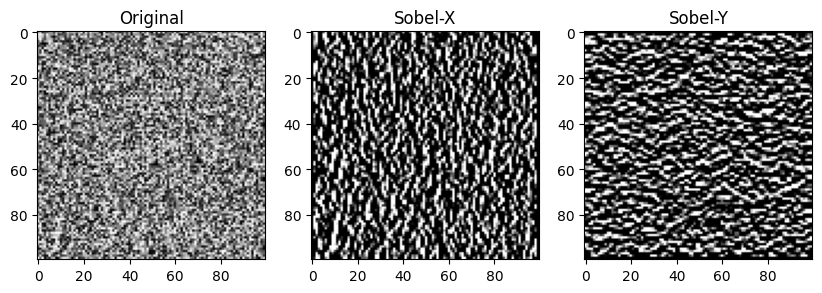

In [2]:
#Question 3: CNN Feature Extraction with Filters and Pooling
#Task 1: Edge Detection Using Convolution
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a sample grayscale image (replace with your image path)
image = cv2.imread('sample_image.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    # Create a dummy image if no file is available
    image = np.random.randint(0, 255, (100, 100), dtype=np.uint8)

# Define Sobel filters
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

# Apply Sobel filters
edge_x = cv2.filter2D(image, -1, sobel_x)
edge_y = cv2.filter2D(image, -1, sobel_y)

# Display images
plt.figure(figsize=(10, 4))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(edge_x, cmap='gray'), plt.title('Sobel-X')
plt.subplot(133), plt.imshow(edge_y, cmap='gray'), plt.title('Sobel-Y')
plt.show()

In [3]:
#Task 2: Max Pooling and Average Pooling

import tensorflow as tf
import numpy as np

# Create a random 4x4 matrix
input_matrix = np.random.randint(1, 10, (4, 4)).astype(np.float32)
input_tensor = input_matrix.reshape(1, 4, 4, 1)  # (batch, height, width, channels)

# Define pooling layers
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)

# Apply pooling
max_pooled = max_pool(input_tensor).numpy().squeeze()
avg_pooled = avg_pool(input_tensor).numpy().squeeze()

# Print results
print("Original Matrix:")
print(input_matrix)
print("\nMax Pooled Matrix:")
print(max_pooled)
print("\nAverage Pooled Matrix:")
print(avg_pooled)

Original Matrix:
[[1. 8. 2. 5.]
 [5. 2. 7. 6.]
 [9. 7. 1. 2.]
 [6. 1. 1. 8.]]

Max Pooled Matrix:
[[8. 7.]
 [9. 8.]]

Average Pooled Matrix:
[[4.   5.  ]
 [5.75 3.  ]]


In [4]:
#Question 4: Implementing and Comparing CNN Architectures
#task 1 Implement AlexNet Architecture

import tensorflow as tf
from tensorflow.keras import layers, models

# Define simplified AlexNet model
model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    layers.Conv2D(256, (5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    layers.Conv2D(384, (3, 3), activation='relu'),
    layers.Conv2D(384, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,767,882 (94.48 MB)

 Trainable params: 24,767,882 (94.48 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#task2  Implement a Residual Block and ResNet
import tensorflow as tf
from tensorflow.keras import layers, models

# Define residual block function
def residual_block(input_tensor, filters):
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(input_tensor)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.Add()([x, input_tensor])  # Skip connection
    x = layers.Activation('relu')(x)
    return x

# Define ResNet-like model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
x = residual_block(x, 64)
x = residual_block(x, 64)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 56, 56, 64)     │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ conv2d_11[0][0],       │
│                           │                        │                │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 56, 56, 64)     │              0 │ conv2d_13[0][0],       │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 200704)         │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │     25,690,240 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │          1,290 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,848,714 (98.61 MB)

 Trainable params: 25,848,714 (98.61 MB)

 Non-trainable params: 0 (0.00 B)